## Introduction
### Types of NLP
![](images/nlp1.jpg)
### Classical NLP Deep Learning NLP
#### Classical 
![](images/nlp2.jpg)
#### DNLP
**1. CNN for text recognition (Classification)**  
**2. Seq2Seq** 
## Bag of Words NLP Modelling 
#### Most adult native English speakers use about 20,000 words.
#### Thus, the standard bag-of-words modelling uses word vectors which have 20,000 elements.
### Building the word vector for training.
![](images/nlp3.jpg)
### We train the model using word vectors as the input (X) and a sentiment analysis label (y) as the ground truth label data.

## Objective - Train an NLP model to determine if a restaurant review is positive or negative (Sentiment Analysis & Classification)

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 284 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 1.1 MB/s eta 0:00:01
  Using cached tqdm-4.60.0-py2.py3-none-any.whl (75 kB)


## Importing the dataset

In [4]:
dataset = pd.read_csv('data/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
len(dataset)

1000

## Data Preprocessing
### Cleaning the text corpus

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i  in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /Users/JJ/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Viewing the text corpus

In [7]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [12]:
print(corpus[0]), print(dataset['Review'][0])

wow love place
Wow... Loved this place.


(None, None)

## Creating the Bag-of-Words Model
### Word Vectorization

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [14]:
X[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
y[:5]

array([1, 0, 0, 1, 1])

## Splitting the dataset into Training and Test sets

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Modelling
## Training and Testing Classification Models on the Training Set
### Comparing Naive Bayes, Random Forest, Decision Tree , Non-Linear SVM  and Gradient Boosted Classifier Models

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

nbc = GaussianNB()
nbc.fit(X_train, y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
from sklearn.metrics import plot_confusion_matrix

def test_model(model):
    plot_confusion_matrix(model, X_test, y_test, colorbar = False, cmap = 'winter')
    print("Accuracy: ", model.score(X_test, y_test))

### Random Forest Results

Accuracy:  0.755


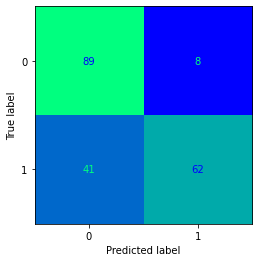

In [27]:
test_model(rfc)

### Decision Tree Results

Accuracy:  0.735


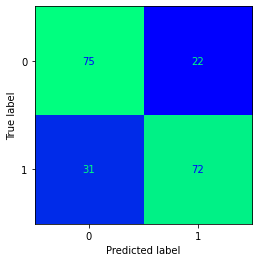

In [28]:
test_model(dtc)

### Naive Bayes Results

Accuracy:  0.73


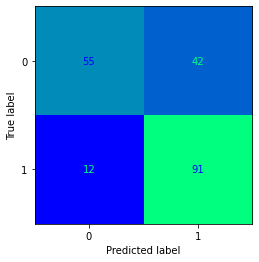

In [29]:
test_model(nbc)

### Non-Linear SVC Results

Accuracy:  0.78


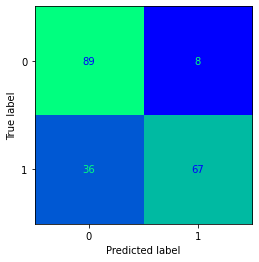

In [31]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf',
         random_state = 0)

svm.fit(X_train, y_train)

test_model(svm)

### Gradient Boosted Classifier Results

Accuracy:  0.735


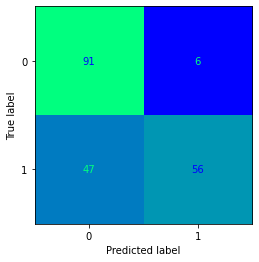

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

test_model(gbc)

## Making new predictions with the SVM model
### Negative Review

In [34]:
new_review = 'Food is horrible !'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
X_new = []
X_new.append(new_review)
X_new = cv.transform(X_new).toarray()

svm.predict(X_new)

array([0])

### Positive Review

In [35]:
new_review = 'Food is wonderful !'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
X_new = []
X_new.append(new_review)
X_new = cv.transform(X_new).toarray()

svm.predict(X_new)

array([1])